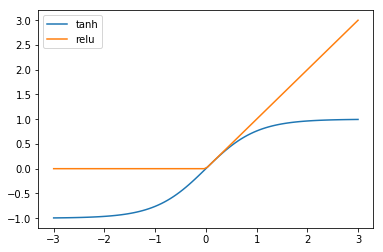

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

line=np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), label='relu')
plt.legend(loc='best')
plt.show()

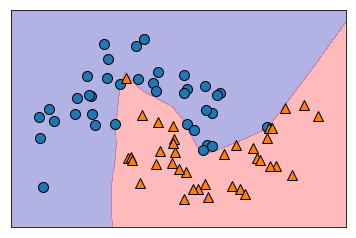

In [10]:
X,y=make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

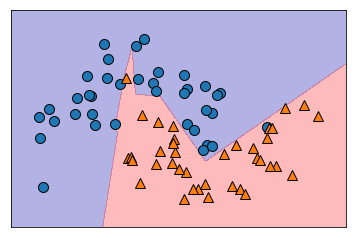

In [18]:
#use less units per hidden layer (100 by default)

mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

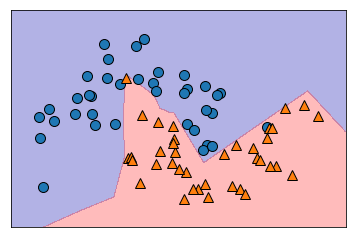

In [17]:
#use more hidden layers

mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

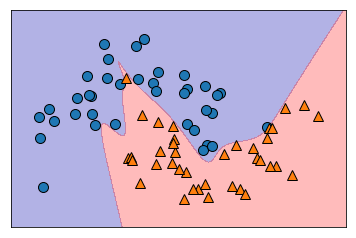

In [19]:
#use tanh non-linearity

mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

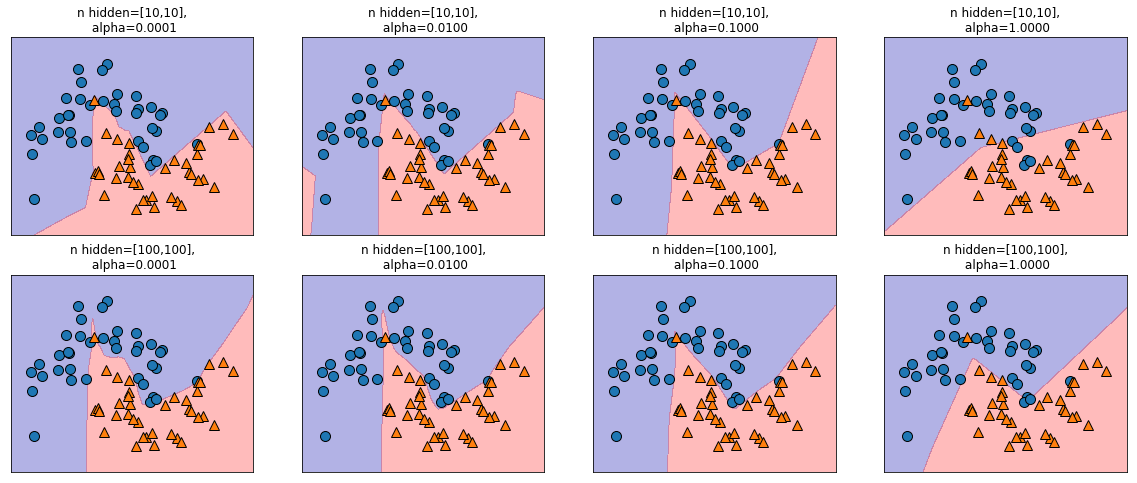

In [24]:
#let's add an L2 penalty as in ridge regression. Alpha controls L2 regularization

fig, axes=plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n hidden=[{},{}],\n alpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))
plt.show()

In [36]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer data per-feature maxima: \n {}".format(cancer.data.max(axis=0)))

cancer data per-feature maxima: 
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [39]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target, random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("accuracy on train: {}".format(mlp.score(X_train,y_train)))
print("accuracy on test: {}".format(mlp.score(X_test,y_test)))

accuracy on train: 0.9061032863849765
accuracy on test: 0.8811188811188811


In [40]:
#performs poorly compared to other models. Let's scale and demean

mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)

print("accuracy on train: {}".format(mlp.score(X_train_scaled,y_train)))
print("accuracy on test: {}".format(mlp.score(X_test_scaled,y_test)))

accuracy on train: 0.9929577464788732
accuracy on test: 0.965034965034965


/root/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
#scaling improved model quite a bit. Let's increase iterations

mlp=MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled,y_train)

print("accuracy on train: {}".format(mlp.score(X_train_scaled,y_train)))
print("accuracy on test: {}".format(mlp.score(X_test_scaled,y_test)))

accuracy on train: 0.9929577464788732
accuracy on test: 0.972027972027972


In [42]:
#iter increased training more so than test

mlp=MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled,y_train)

print("accuracy on train: {}".format(mlp.score(X_train_scaled,y_train)))
print("accuracy on test: {}".format(mlp.score(X_test_scaled,y_test)))

accuracy on train: 0.9882629107981221
accuracy on test: 0.972027972027972
